In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/Hr_Analytics.csv')
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


### satisfactoryLevel --> how much the employee is satisfied about the company

### lastEvaluation --> Final evaluation of the employee by hr(monthly , year)

### numberOfProjects --> no of projects the employee has worked

### avgMonthlyHours --> monthly how many hours the employee is working

### timeSpent.company --> since how many years the employee is working in a company or tenure

### workAccident --> whether he/she has any conflict with any other employee or not
    0 --> does not have any conflict/fight with other employee
    1 --> has a conflict

### left --> the employees are about to leave or not
    0 --> they didn't given notice period (not leaving the company)
    1 --> they already put the notice period(leaving the company)

### promotionInLast5years-->the employee got the promotion since last 5 years or not
    0 --> they never got the promotion since last 5 years
    1 --> they got the promotion since last 5 years

### dept --> which department

### salary --> salary of the employee

In [3]:
print(df.shape)
df.info()

(14999, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [5]:
df.duplicated().sum()

3008

In [6]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

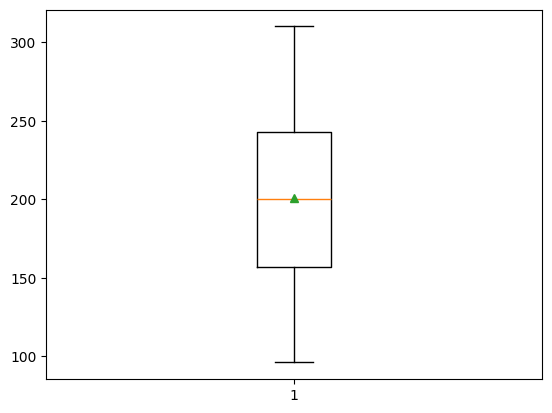

In [7]:
plt.boxplot(df["avgMonthlyHours"], showmeans=True)
plt.show()

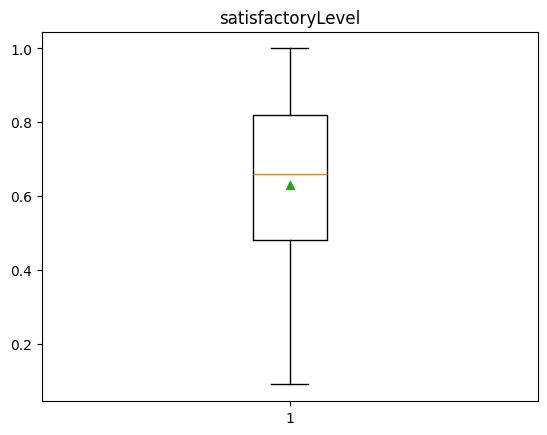

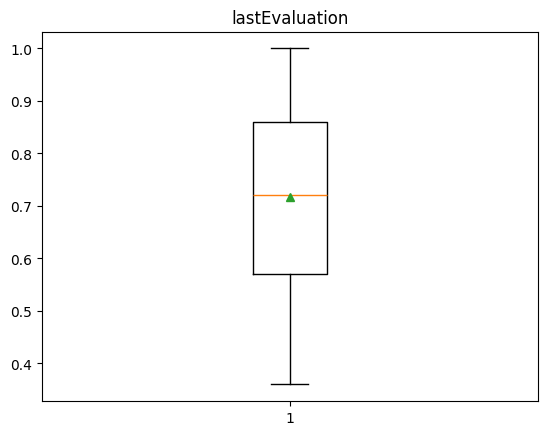

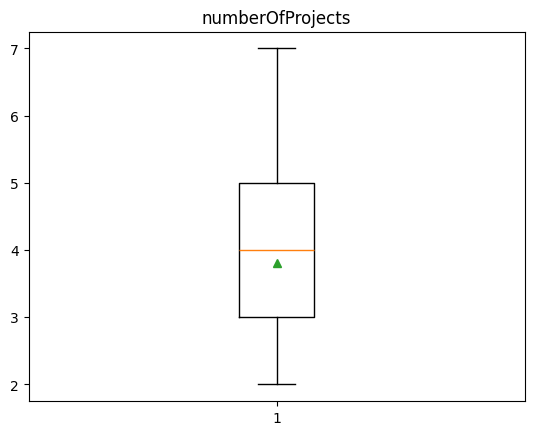

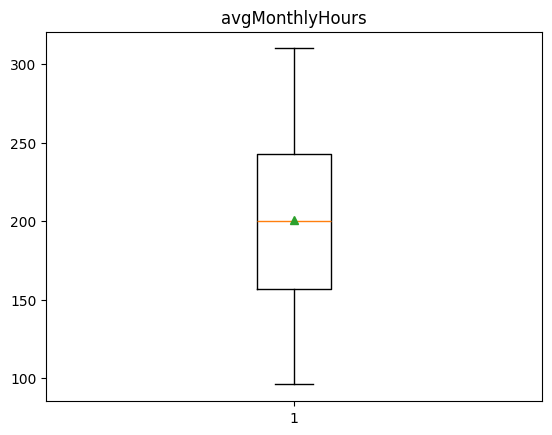

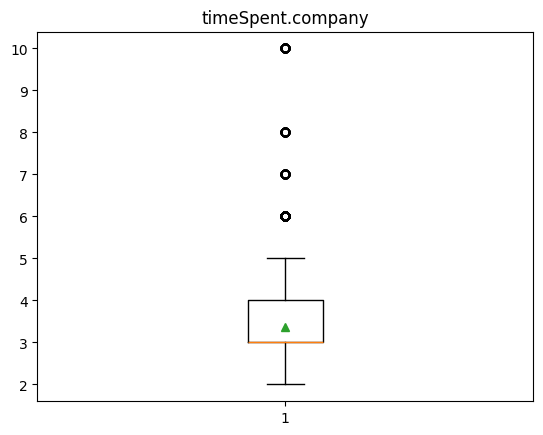

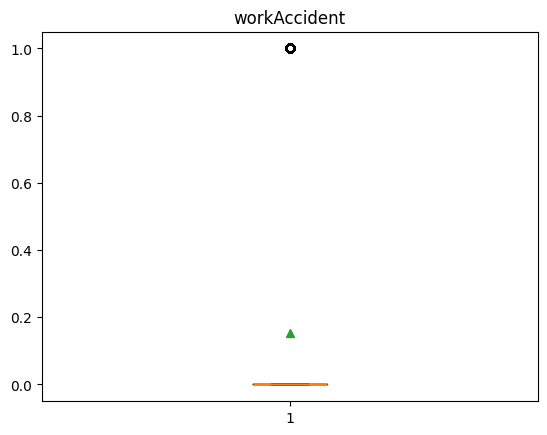

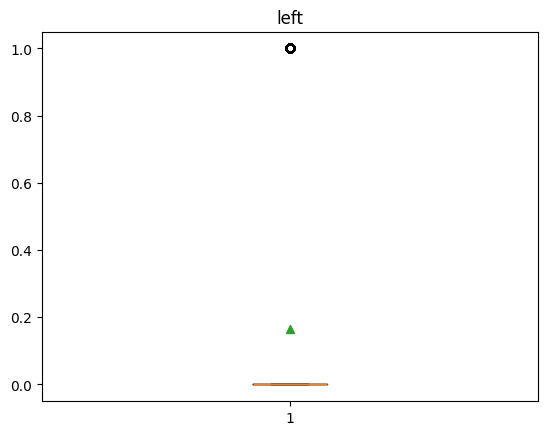

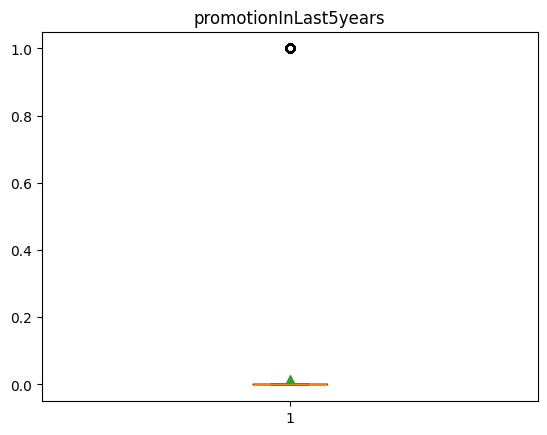

In [8]:
for col in df.columns:
    if df[col].dtype != "object":
        plt.boxplot(df[col], showmeans=True)
        plt.title(col)
        plt.show()

>

# visual analysis to get inferences from the data

aim - to understand why employees are leaving the company

to give suggestion to the HR so they can retain their employees

In [9]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

>

('satisfactoryLevel', 'lastEvaluation') are not much important as they are not helping us to infer the reasons for leaving

>

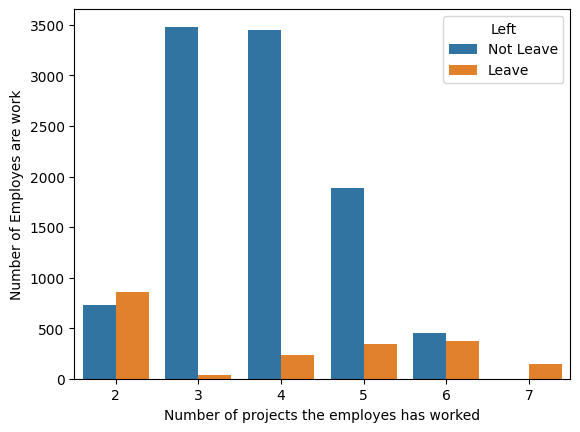

In [10]:
# number of projects , left
#0 - not leaving
# 1 - leaving
# the situation wen we have a numerical variable then to use countplot

sns.countplot(x=df["numberOfProjects"], hue="left", data=df)
plt.xlabel("Number of projects the employes has worked")
plt.ylabel("Number of Employes are work")
plt.legend(['Not Leave', 'Leave'], title="Left", loc="best")
plt.show()

### inference - 
    
* Employees assigned to 2 or 7 projects are leaving the company more frequently.

### suggestions - 
    
* Redistribute projects from employees handling 7 projects to those with 2 projects.
* Ensure project assignments average between 3-5 per person.

>

>

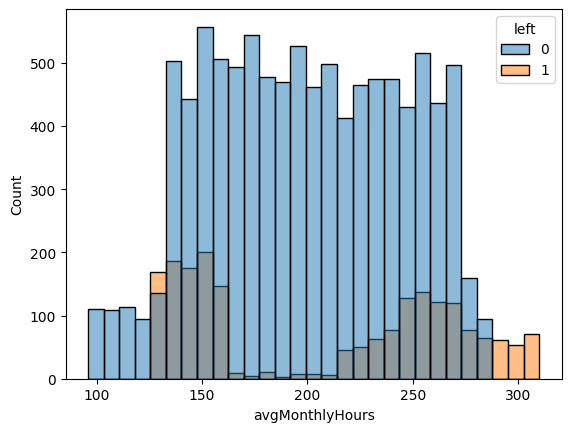

In [11]:
# the variation in averagemonthlyhours according to the left column
sns.histplot(x="avgMonthlyHours", data=df, hue="left")
plt.show()

### Inference:
* Employees are leaving the company due to excessive average monthly working hours.

### Suggestion:
* Offer additional incentives for employees who are willing to work extra hours.

>

>

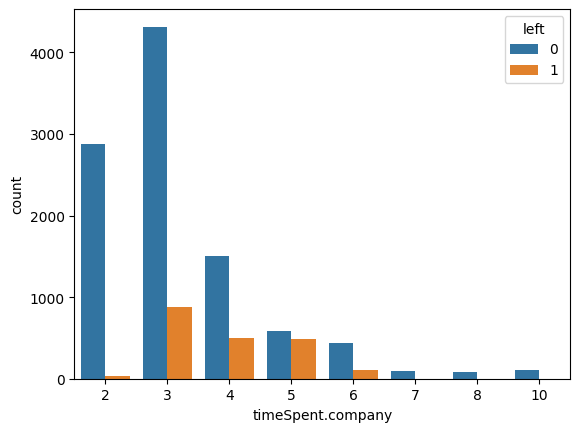

In [12]:
# variation in the timespent in the company w.r.t leaving the company
sns.countplot(x="timeSpent.company", data=df, hue="left")
plt.show()

### Inference:
* Employees tend to leave the organization after gaining 3-5 years of experience.

### Suggestion:
* Provide superior roles or salary increments to employees once they complete 3-5 years of service.

>

>

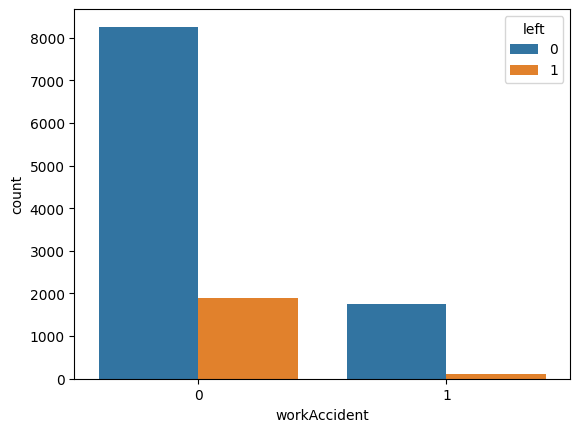

In [13]:
# how according to workaccident people are leaving the company
sns.countplot(x="workAccident", hue="left", data=df)
plt.show()

**Inference:** Work accidents are not the reason for employees leaving the company.

**Suggestion:** Ensure a positive working environment to prevent conflicts.

>

>

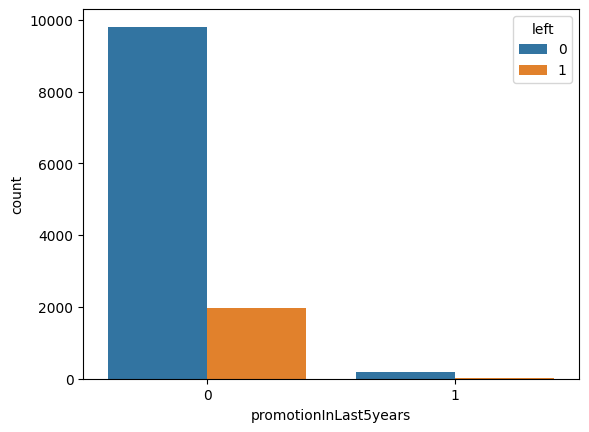

In [14]:
# the variation in the promotion and how it is affecting in people leaving the comapany
sns.countplot(x="promotionInLast5years", hue="left", data=df)
plt.show()

### Inference:
* Employees who have not received promotions in the last 5 years are more likely to leave.

### Suggestion:
* HR should offer regular promotions to employees to enhance retention.

>

>

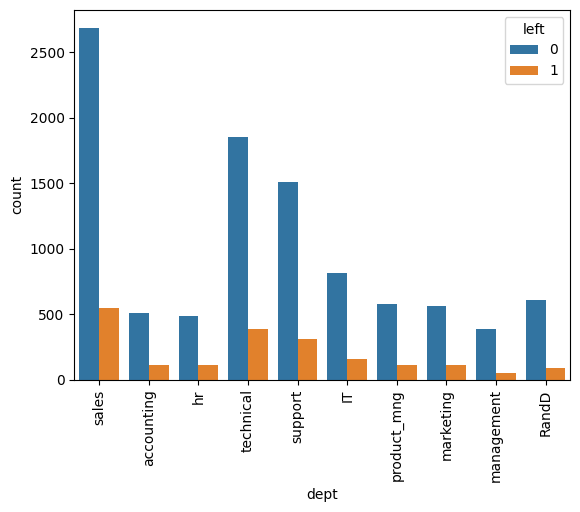

In [15]:
# lets visulaise how variation in dept are affecting the leaving rate of the company
sns.countplot(x="dept", data=df, hue="left")
plt.xticks(rotation=90)
plt.show()

### Inference:
* Employees from Sales, Technical, and Support departments are leaving the company at a higher rate.

### Suggestions:
* Allow employees to transition to other departments based on their qualifications.
* Offer incentives, improve team management, and hold team meetings to address employee concerns.
* Organize team outings, lunches, and recreational activities to reduce stress levels and boost morale.

>

>

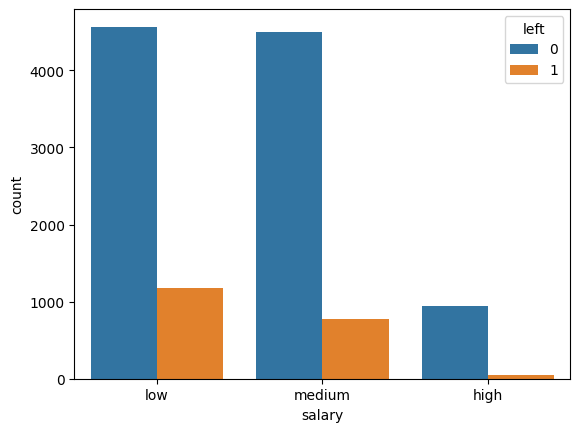

In [16]:
# how to visualize the salary factors is affecting the people who are leaving
sns.countplot(x="salary", data=df, hue="left")
plt.show()

### Inference:
* Employees with low or medium salaries are leaving the company.

### Suggestion:
* Implement regular salary hikes based on experience and market value, along with promotions, incentives, and project changes.